## **Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.**

## **1. Импорт необходимых библиотек и загрузка данных**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Используем данные из соревнования [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data?select=test.csv)

In [5]:
# Будем использовать только обучающую выборку
data = pd.read_csv('data/train.csv', sep=",")

## **2. Первичный анализ данных**

In [6]:
data.shape

(891, 12)

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **3. Обработка пропусков в данных**

1) Т.к. целевым признаком является Survived колонка с номером каюты бесполезна для обучения и может быть удалена
2) 2 пропуска из колонки Ebarked разрешим удалением строчек
3) Колонку возраста импьютируем

In [13]:
data = data.dropna(subset=['Embarked'])
data = data.drop('Cabin', axis=1)

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
data_age = data[['Age']]
data_age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [24]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_age)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [35]:
from sklearn.impute import SimpleImputer
# Создаем копию колонки для импутации (SimpleImputer ожидает 2D данные)
age_data = data[['Age']].copy()

strategy = 'median'

# Создаем и обучаем импутер
imputer = SimpleImputer(strategy=strategy)
imputed_age = imputer.fit_transform(age_data)

data['Age'] = imputed_age

## **4. Преобразование категориальных признаков в числовые**

LabelEncoder подходит для бинарных признаков:

In [30]:
from sklearn.preprocessing import LabelEncoder
# Создаём объект LabelEncoder
le = LabelEncoder()

# Применяем к столбцу 'Sex' (Male/Female → 0/1)
data['Sex_encoded'] = le.fit_transform(data['Sex'])

print(data[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


One-Hot Encoding Создаёт отдельный столбец для каждой категории (подходит для номинальных признаков без порядка).

In [ ]:
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')
print(data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


Классы можно было бы закодировать ручым кодированием, но они и так расставлены по порядку (1, 2, 3)

## **5. Масштабирование данных**

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [45]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
data_numeric = data[numeric_features].copy()

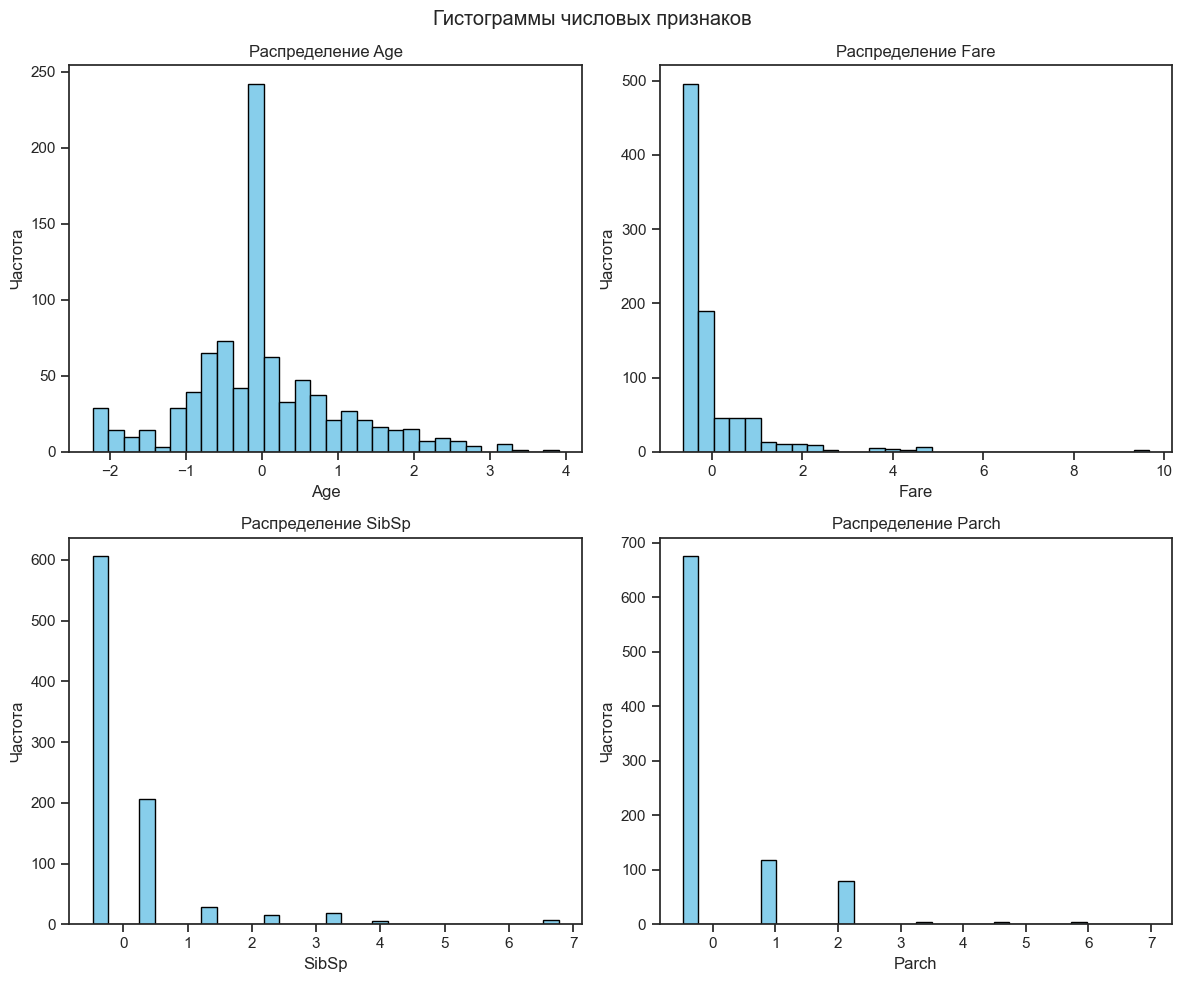

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Гистограммы числовых признаков')

for i, feature in enumerate(numeric_features):
    row, col = i // 2, i % 2
    axes[row, col].hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Распределение {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Fare имеет огромные выбросы, Age аномальные значения (< 0), использем Z-score

In [51]:
scaler_z = StandardScaler()
df_zscore = pd.DataFrame(scaler_z.fit_transform(data_numeric), columns=numeric_features)

# Добавление обратно в исходный датафрейм
data[numeric_features] = df_zscore
df_zscore.head()

,Age,Fare,SibSp,Parch
0,-0.563674,-0.500240,0.431350,-0.474326
1,0.669217,0.788947,0.431350,-0.474326
2,-0.255451,-0.486650,-0.475199,-0.474326
3,0.438050,0.422861,0.431350,-0.474326
4,0.438050,-0.484133,-0.475199,-0.474326
